### Time Series Analysis - Assignment 1 ###
### Jose Ferreira ###

**1. Is the following AR(2) process:**
$$
X_{t} = 1.92 - 1.1X_{t-1} + 0.18X_{t-2} + \epsilon_{t}, \ \epsilon_{t} \sim N(0,1) \\
$$
**covariance stationary? If so, calculate its mean and all autocovariances.**

The process is covariance stationary if all the roots of the characteristic equation are outside of the unit circle i.e. their absolute value is strictly larger than 1.

Characteristic equation: $ 1 + 1.1z - 0.18z^2$ 

Roots: $z_1=\frac{55 + \sqrt{4825}}{18}; z_2 = \frac{55 - \sqrt{4825}}{18}$

$
\implies \lvert z_1 \rvert \approx 6.91; \lvert z_2 \rvert \approx 0.8
$

$
\implies \text{The process is not covariance stationary}
$

To convince us further this in fact the case, let's try to simulate the process. The series grows without bound and indeed they intuitively look non-stationary (variance across time is not preserved, the series is not homoscedastic).

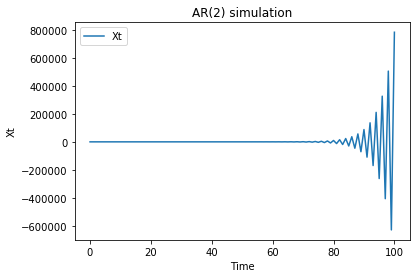

In [1]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARMA

alpha=1.92 
beta1=-1.1 
beta2=0.18
sigma=0.001
#Simulate AR(1) 
T=100
x0=alpha/(1-beta1-beta2) 
x=np.zeros(T+1) 
x[0]=x0
x[1]=x0
eps=np.random.normal(0.0,sigma,T) 
for i in range(2,T+1): 
    x[i]=alpha+beta1*x[i-1]+beta2*x[i-2]+eps[i-1]
plt.figure()
plt.plot(x, label='Xt')
plt.title('AR(2) simulation')
plt.xlabel('Time')
plt.ylabel('Xt')
plt.legend()
plt.show()

**2. Carry out a detailed discussion of the conditions on** $\beta_{1}$ **and** $\beta_{2}$ **under which the AR(2) time series**
$$ X_t = \alpha +\beta_1X_{t-1}+\beta_2X_{t-2} + \epsilon _t, \ \epsilon _t \sim N(0,\sigma^2) $$
**is covariance stationary**

AR(2) can be expressed by
$$ X_t-\mu =  +\beta_1(X_{t-1}-\mu)+\beta_2(X_{t-2}-\mu) + \epsilon _t $$

times $X_{t-k}$ on both sides and take expectation

$$\Gamma_k=\beta_1 \Gamma_{k-1}+\beta_2\Gamma_{k-2}$$

Let $x_1$ and $x_2$ be the roots of $\phi(x)=1-\beta_1x-\beta_2x^2$. 

Base on this recursion formula, we have the general form for $\Gamma_k$

$$
\Gamma_k=a(\frac{1}{x_1})^k+b(\frac{1}{x_2})^k
$$

If we plug $\Gamma_0$ and $\Gamma_1$ in, we can get values of a and b.

To make the $\Gamma_k$ not blow up, we must have $x_1$ and $x_2$ on or outside the unit root in complex plain. Now we show $x_1$ and $x_2$ can not be on the unit circle by contradiction.

Assume $z=a+bi$ on the unit circle, which means $a^2+b^2=1$. We plug it in the $\phi(x)$

$$
1-\beta_1(a+bi)-\beta_2(a^2-b^2+2abi)=0
$$

which equals to

$$
1-\beta_1a-\beta_2(a^2-b^2)=0,\qquad\beta_1b+2ab\beta_2=0
$$

1) when $b=0$, $z=\pm 1$, we have $(1-\beta_2^2)=\beta_1^2$

2) when $b\neq 0$, we have $\beta_1=-2a\beta_2$ and $a+2a^2\beta_2-\beta_2(2a^2-1)=0$, so we have $\beta_2=-1$


Recall that

$$
 \Gamma_0 = \frac{(1-\beta_2)\sigma^2}{(1+\beta_2)(1-\beta_1-\beta_2)(1+\beta_1-\beta_2)}
$$

So under 1) and 2), we both make $\Gamma_0$ undefine. So the roots of $\phi(x)$ cannot on the unit circle.
 

So the roots of $\phi(x)$ must outside the unit circle.



**Now we want to find the constrains of coefficients of AR(2) process, given covriance stationary.**

An AR(2) process is specified by:
$$
\begin{equation}
    X_t = \alpha + \beta_1X_{t-1} + \beta_2X_{t-2} + \epsilon_t \qquad\qquad  \text{(1)} \\
\end{equation}
$$
where $\alpha$, $\beta_1$ and $\beta_2 \in \mathbf{R}$ and $\epsilon_t \sim N(0,\sigma^2)$

We know that the roots of the inverse characteristic equation must lie inside the unit circle for the series to be stationary and, as direct consequence: $\lvert \beta_2 \rvert < 1$.

Inverse characteristic equation: $\lambda^2 - \beta_1\lambda - \beta_2 = 0$

Roots: $\lvert \lambda_{1,2} \rvert = \left|{\frac{\beta_1 \pm \sqrt{\beta_1 + 4\beta_2}}{2}}\right| < 1$

$\implies \lvert \lambda_1\lambda_2 \rvert = \lvert \beta_2 \rvert < 1 \qquad \qquad \text{(2)}$ 

Taking expectations on both sides of (1) and considering we need to have a finite mean for stationarity, we obtain:

$
\mu =  \alpha + \beta_1\mu + \beta_2\mu
$

$
\implies  \mu = \frac{\alpha}{1-\beta_1-\beta_2}
$

$
\implies  1-\beta_1-\beta_2 \ne 0
$

$
\implies  \beta_1+\beta_2 \ne 1 \qquad\qquad  \text{(3)}
$

Additional conditions for $\beta_1$ and $\beta_2$ can be determined using the Yule-Walker equations:

$$
\begin{align}
\Gamma_0 = \beta_1\Gamma_1 + \beta_2\Gamma_2 + \sigma^2 \qquad \text{(4)}\\
\Gamma_1 = \beta_1\Gamma_0 + \beta_2\Gamma_1 \qquad \qquad \text{(5)}\\
\Gamma_2 = \beta_1\Gamma_1 + \beta_2\Gamma_0 \qquad \qquad \text{(6)}\\
\end{align}
$$

We can derive an expression for $\Gamma_0$, the variance of $X_t$, in terms of the beta coefficients by algebraic manipulation (equation (40) in the lecture notes).

$$
\begin{equation}
    \Gamma_0 = \frac{(1-\beta_2)\sigma^2}{(1+\beta_2)(1-\beta_1-\beta_2)(1+\beta_1-\beta_2)} \qquad\qquad \text{(7)}
\end{equation}
$$

Since $\Gamma_0$ represents the variance of $X_t$, the expression in (7) has to be positive.

We know $(1-\beta_2)$ is greater than zero since $\lvert \beta_2 \rvert < 1$. 

Therefore, the denominator $(1+\beta_2)(1-\beta_1-\beta_2)(1+\beta_1-\beta_2)$ needs to be greater than zero.

The factor $(1+\beta_2)$ is greater than zero, we need $(1-\beta_1-\beta_2)(1+\beta_1-\beta_2)$ to be also greater than zero.

The only way for this to happen is for both factors to be greater than zero, it is not possible to have the case of both being negative since:

$(1-\beta_1-\beta_2) < 0$ and $(1+\beta_1-\beta_2) < 0$

$\implies \beta_1>(1-\beta_2)$ and $\beta_1>-(1-\beta_2)$.

So we have for both positive factors:

$(1-\beta_1-\beta_2) > 0$ and $(1+\beta_1-\beta_2) > 0$

$\implies \beta_1+\beta_2 < 1$ and $\beta_2 - \beta_1 < 1 \qquad \qquad \text{(7)}$ 

To sum up, we have three conditions for stationarity of the AR(2) process:
* $\lvert \beta_2 \rvert < 1$
* $\beta_1 + \beta_2 < 1$
* $\beta_2 - \beta_1 < 1$

The inequalities define a triangular area where the series AR(2) will be stationary:

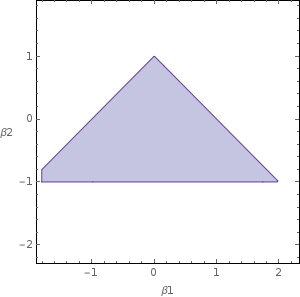

**3. Consider the time series of daily returns on two ETFs tracking broad market indices: SPY and IWV over the last 10 years, and let** $X_t$ **denote the difference of these returns. Try to model** $X_t$ **as an AR(p) time series model, and discuss the results.**

We retrieve daily adjusted close data for the two ETFs from Yahoo! Finance, calculate daily returns and set our series to be the difference SPY - IWV. 

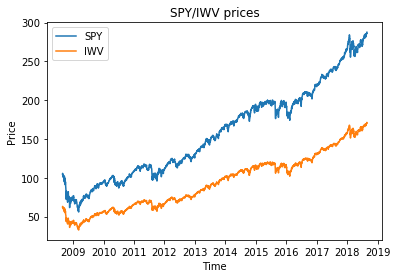

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  


spy = pd.read_csv('SPY.csv', 
                  usecols=['Date','Adj Close'],
                  index_col=0,
                  parse_dates=True,
                  infer_datetime_format=True
                 )
iwv = pd.read_csv('IWV.csv', 
                  usecols=['Date','Adj Close'],
                  index_col=0,
                  parse_dates=True,
                  infer_datetime_format=True
                 )
plt.figure()
plt.plot(spy,label='SPY')
plt.plot(iwv,label='IWV')
plt.title('SPY/IWV prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

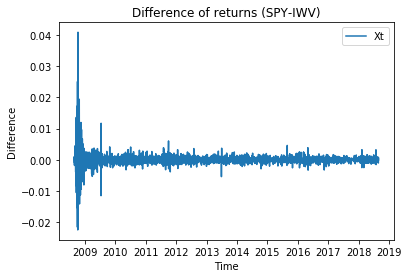

In [3]:
spy.loc[:, 'Returns'] = spy['Adj Close'].pct_change(1)
iwv.loc[:, 'Returns'] = iwv['Adj Close'].pct_change(1)

xt = (spy['Returns'] - iwv['Returns']).dropna()
plt.figure()
plt.plot(xt,label='Xt')
plt.title('Difference of returns (SPY-IWV)')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.show()

First and foremost, we need to confirm the resulting series is covariance stationary. From the plot, it certainly looks more or less so with the exception of the presence of a larger than average variance around 2008-2009.
We can look at the definition of stationarity and perform simple tests over the mean, variance and correlation of the series as an initial diagnostic tool.
We know that, for a series to be stationary:

* the expected value for any t is a constant $\mu$.
* the variance does not change through time.
* the autocovariance between two points only depends on the distance between the two points. 

We can split the data into several sections and calculate the mean and variance of each group to compare.

In [32]:
size = len(xt)
x1, x2, x3 = xt[0:size//3], xt[(size//3)+1:(2*size)//3], xt[((2*size)//3)+1:]
mean1, mean2, mean3 = x1.mean(), x2.mean(), x3.mean()
var1, var2, var3 = x1.var(), x2.var(), x3.var()
print('mean1=%.6f, mean2=%.6f, mean3=%.6f' % (mean1, mean2, mean3))
print('variance1=%.6f, variance2=%.6f, variance3=%.6f' % (var1, var2, var3))

mean1=-0.000004, mean2=-0.000007, mean3=0.000011
variance1=0.000010, variance2=0.000001, variance3=0.000001


It seems that, in regards to the first and second conditions, this series can be stationary.

For the third condition, we can look at the auto-correlation and partial auto-correlation plots. The auto-correlation (ACF) and partial auto-correlation function (PACF) plots hint that the series might not be stationary. There are significant changes in the values of correlation even beyond lag 20.

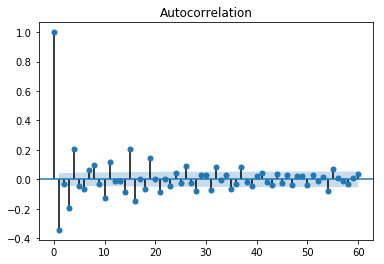

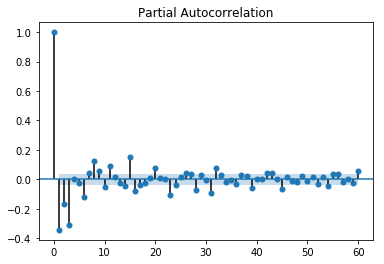

In [33]:
import statsmodels.graphics.tsaplots as tsaplots
_ = tsaplots.plot_acf(xt,lags=60)
_ = tsaplots.plot_pacf(xt,lags=60)

Another option to check for stationarity is to perform an statistical test like the augmented Dickey-Fuller (ADF) test.

The null hypothesis of the ADF test is that the time series is not stationary.
The alternate hypothesis is that the time series is stationary.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

In [36]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(xt)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
for key, value in test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.367593
p-value: 0.000000
	1%: -3.433
	5%: -2.863
	10%: -2.567


According to the above results, we can clearly assume that the series is stationary and we can try to fit this data to an AR process. A way to do this is to decide on a maximum number of lags and calculate the AIC value for all of the possible models. The parameter p resulting from the model with the minimum of the AIC values is chosen.
Having chosen the maximum number of lags to be 20, the algorithm found that including most of the parameters would improve the AIC value.

In [37]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AR
import statsmodels.tsa as tsa
import warnings
from IPython.core.display import display, HTML

#estimate model parameters
maxOrder = 20
aic = {}
print('| # Lags\t| AIC\t\t|')
print('--------------------------------')
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    for i in range(1, maxOrder+1):
        model=AR(xt).fit(maxlag=i,ic='aic',method='mle')
        aic[i] = model.aic
        print('| ' + str(i) + '\t\t| ' + str(model.aic) + '|')

| # Lags	| AIC		|
--------------------------------
| 1		| -12.6070813635|
| 2		| -12.6349661702|
| 3		| -12.7343519485|
| 4		| -12.7343519485|
| 5		| -12.7343519485|
| 6		| -12.7477722064|
| 7		| -12.7490786648|
| 8		| -12.7645257715|
| 9		| -12.7670811735|
| 10		| -12.7692238842|
| 11		| -12.7769608069|
| 12		| -12.7769606782|
| 13		| -12.7769606782|
| 14		| -12.7776649573|
| 15		| -12.7995859493|
| 16		| -12.8050444783|
| 17		| -12.8061751047|
| 18		| -12.8060786738|
| 19		| -12.806175105|
| 20		| -12.810202373|


Again, the auto-correlation (ACF) and partial auto-correlation function (PACF) plots are an useful tool to understand what might be happening. The PACF will display the partial correlation which each of the lagged values and one would expect that, for an ideal AR(p) process, the significance of correlation values beyond p to disappear.

This is not the case when the graph is generated for the time series in study. We see there is an important amount of correlation with the previous 3 days but also that the importance of the lag values does not really fade when increasing the lag amount. We can observe the same in the ACF plot, there are significant values of correlation with lag values like 4, 8 and 15 among others which might be an indication of the presence of weekly seasonality in the series.

There are indications that an AR model would not fit the data very well, for now, and as a rough approximation, let's try to fit the data to an AR(3) model since the partial autocorrelation graph has highlighted the fact that there is strong correlation with these lagged values. The parameters found using maximum likelihood function optimization are:

In [38]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    model=AR(xt).fit(maxlag=3,ic='aic',method='mle')
print(model.params)

const         0.000002
L1.Returns   -0.453953
L2.Returns   -0.292063
L3.Returns   -0.308462
dtype: float64


Compare with the parameters obtained for an AR(20) fit. The values beyond 3 are smaller in scale  but significant (see, for example the L8 value).

In [21]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    model=AR(xt).fit(maxlag=20,ic='aic',method='mle')
print(model.params)

const          0.000003
L1.Returns    -0.439387
L2.Returns    -0.267598
L3.Returns    -0.332409
L4.Returns    -0.036391
L5.Returns    -0.007865
L6.Returns    -0.038271
L7.Returns     0.094687
L8.Returns     0.161386
L9.Returns     0.075406
L10.Returns   -0.009110
L11.Returns    0.071340
L12.Returns    0.020392
L13.Returns   -0.039328
L14.Returns   -0.012798
L15.Returns    0.093671
L16.Returns   -0.099702
L17.Returns   -0.027453
L18.Returns   -0.002111
L19.Returns    0.043946
L20.Returns    0.077184
dtype: float64


+ $ Bonus$ $Question$
 
 $ Solution: $
 
 We solve the SDE and then match the parameters. 
 
 $$ dX_{t} = \lambda ( \mu - X_{t}) dt + \gamma dW_{t} $$
 
 $\Rightarrow$ $$ dX_{t} + \lambda X_{t} dt = \lambda  \mu  dt + \gamma dW_{t} $$
 
 $\Rightarrow$
  $$e^{\lambda t} dX_{t} + \lambda e^{\lambda t}X_{t} dt = \lambda  \mu e^{\lambda t} dt + \gamma e^{\lambda t}dW_{t} $$
 
 $\Rightarrow$
 $$ de^{\lambda t}X_{t} =   \mu de^{\lambda t} + \gamma e^{\lambda t}dW_{t} $$
 
 Integrate from $X_{t}$ to $X_{t+1}$:
 
 $$ e^{\lambda (t+1)} X_{t+1} - e^{\lambda t} X_{t} = \mu( e^{\lambda (t+1)} - e^{\lambda t}) + \gamma \int_{t}^{t+1} e^{\lambda k}\, dW_{k}$$
 
 Compare the above equation with AR model:
 $$ X_{t} = \alpha + \beta X_{t-1} + \epsilon_{t}, \quad \epsilon_{t} \sim N(0,\sigma^2)$$
 
 Thus, we first know that :
 
 $$ \alpha = \mu(1-e^{-\lambda}) ,\ \beta = e^{-\lambda}$$
 
 Consider the term 

$$ \gamma e^{-\lambda (t+1)}  \int_{t}^{t+1} e^{\lambda k}\, dW_{k}$$

$$ = \gamma e^{-\lambda} \int_{0}^{1} e^{\lambda k}\, dW_{k}$$

$ \quad $ It is actually random distributed with mean 0 and variance 

$$\gamma ^2e^{-2\lambda}\int_{0}^{1} e^{2\lambda k}\, d_{k}$$
$$ = \frac{\gamma^2 (1- \ e^{-2\lambda})}{2\lambda}$$

$ \quad $ Thus, $$\epsilon_{t} \sim N(0,\frac{\gamma^2 (1- \ e^{-2\lambda})}{2\lambda})$$
$$ \sigma = \gamma \sqrt{\frac{(1- \ e^{-2\lambda})}{2\lambda} }$$

$ \quad $ The answer is :
$$ \alpha = \mu(1-e^{-\lambda}) ,\ \beta = e^{-\lambda}$$
 $$ \sigma = \gamma \sqrt{\frac{(1- \ e^{-2\lambda})}{2\lambda} }$$